## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Load the dataframe

In [2]:
# Load train dataset
df = pd.read_csv("../1_decision_tree/train_split.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...


In [3]:
X_train = df.drop(columns=['0', '1', "video_name", "salient"])
y_train = df["salient"]

## Train the tree

In [4]:
# Initialize the Random Forest Classifier with hyperparameters to prevent overfitting
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=10,
    max_depth=7,         
    min_samples_split=15,  
    min_samples_leaf=6,  
    max_features='sqrt',
    bootstrap=True
)

In [5]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=15,
                       n_estimators=10, random_state=42)

## Predict each frame

In [6]:
test_dir = os.path.join(os.getcwd(), '../1_decision_tree/data/test_poses')

In [7]:
video_path = '/home/sadat/Desktop/cow-bytes/experiments/1_decision_tree/data/test_poses/e8793e070b7f0381aef1a8f802010929abf59e7dd0014be27be3844ff54ae181_1.npy'

In [8]:
# Load the NumPy array from the file
np_array = np.load(video_path)

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(np_array)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.137225,110.963758,0.306855,2.260341,0.477995,35.375833,0.060315,0.199483,0.102080,0.152264,...,1.468374,0.722482,0.451402,0.209278,1.718577,0.936048,0.430766,0.627155,0.247798,0.401258
1,1.137232,109.921817,0.301530,0.950430,0.479558,22.886365,0.060801,0.204045,0.102130,0.152528,...,1.463507,0.723907,16.875800,0.044020,1.743550,2.219415,0.430768,0.625561,12.804963,9.823662
2,1.778674,48.686319,0.390972,0.965363,0.618071,4.885290,0.079244,0.148892,0.152647,0.173060,...,1.465342,0.155233,16.921700,0.038784,1.772231,0.699099,2.526505,0.878061,1.630164,35.579337
3,1.142504,51.771859,0.293988,0.968027,0.631099,10.606872,0.083047,0.154644,0.130973,0.196869,...,1.466963,0.157389,17.069406,0.036994,1.820661,0.698094,2.510655,0.836347,1.516369,42.713863
4,1.143020,53.597939,0.293568,0.969031,0.663967,11.293593,0.087403,0.161941,0.133308,0.089083,...,2.703698,0.175487,0.481041,1.002033,1.843062,0.698317,2.495618,0.841503,0.097235,0.555733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.151795,70.012174,0.292668,2.331234,0.475399,2.895523,0.055944,0.101175,0.098884,0.139448,...,1.539109,0.116544,0.415488,0.075335,1.858311,62.297074,28.909496,1.322522,11.376201,39.705246
120,1.151794,70.009131,0.292668,2.331228,0.475395,2.895556,0.055944,0.101175,0.098884,0.139447,...,1.539112,0.116543,0.415486,0.075336,1.858313,62.295608,28.910144,1.322521,11.375939,39.705537
121,1.151794,70.010484,0.292668,2.331228,0.475396,2.895547,0.055944,0.101175,0.098884,0.139447,...,1.539110,0.116543,0.415487,0.075336,1.858307,62.295607,28.910167,1.322521,11.375951,39.705538
122,1.151794,70.009131,0.292668,2.331228,0.475395,2.895556,0.055944,0.101175,0.098884,0.139447,...,1.539112,0.116543,0.415486,0.075336,1.858313,62.295608,28.910144,1.322521,11.375939,39.705537


In [10]:
from scipy.signal import savgol_filter

# Predict the class for each row
predictions = clf.predict(df)

# Get predicted probabilities
probabilities = clf.predict_proba(df)

original_df = df.copy()
df = original_df.copy()

# Optionally add predictions to the dataframe
df['prediction'] = predictions

# Get the predictions proba
df['Class_0_Confidence'] = probabilities[:, 0]
df['Class_1_Confidence'] = probabilities[:, 1]

# Define the window size for SMA
window_size = 5

# Compute the SMA
df['SMA_Confidence'] = df['Class_1_Confidence'].rolling(window=window_size, min_periods=1).mean()

# Define parameters for Savitzky-Golay filter
window_length = 11  # Window length must be odd
polyorder = 2       # Polynomial order

# Apply Savitzky-Golay filter
df['SG_Confidence'] = savgol_filter(df['Class_1_Confidence'], window_length=window_length, polyorder=polyorder)

/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,prediction,Class_0_Confidence,Class_1_Confidence,SMA_Confidence,SG_Confidence
0,1.137225,110.963758,0.306855,2.260341,0.477995,35.375833,0.060315,0.199483,0.102080,0.152264,...,0.936048,0.430766,0.627155,0.247798,0.401258,0,0.624161,0.375839,0.375839,0.295703
1,1.137232,109.921817,0.301530,0.950430,0.479558,22.886365,0.060801,0.204045,0.102130,0.152528,...,2.219415,0.430768,0.625561,12.804963,9.823662,0,0.776899,0.223101,0.299470,0.325260
2,1.778674,48.686319,0.390972,0.965363,0.618071,4.885290,0.079244,0.148892,0.152647,0.173060,...,0.699099,2.526505,0.878061,1.630164,35.579337,0,0.651410,0.348590,0.315843,0.350333
3,1.142504,51.771859,0.293988,0.968027,0.631099,10.606872,0.083047,0.154644,0.130973,0.196869,...,0.698094,2.510655,0.836347,1.516369,42.713863,0,0.601269,0.398731,0.336565,0.370924
4,1.143020,53.597939,0.293568,0.969031,0.663967,11.293593,0.087403,0.161941,0.133308,0.089083,...,0.698317,2.495618,0.841503,0.097235,0.555733,0,0.601269,0.398731,0.348998,0.387032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.151795,70.012174,0.292668,2.331234,0.475399,2.895523,0.055944,0.101175,0.098884,0.139448,...,62.297074,28.909496,1.322522,11.376201,39.705246,0,0.808844,0.191156,0.191156,0.191156
120,1.151794,70.009131,0.292668,2.331228,0.475395,2.895556,0.055944,0.101175,0.098884,0.139447,...,62.295608,28.910144,1.322521,11.375939,39.705537,0,0.808844,0.191156,0.191156,0.191156
121,1.151794,70.010484,0.292668,2.331228,0.475396,2.895547,0.055944,0.101175,0.098884,0.139447,...,62.295607,28.910167,1.322521,11.375951,39.705538,0,0.808844,0.191156,0.191156,0.191156
122,1.151794,70.009131,0.292668,2.331228,0.475395,2.895556,0.055944,0.101175,0.098884,0.139447,...,62.295608,28.910144,1.322521,11.375939,39.705537,0,0.808844,0.191156,0.191156,0.191156


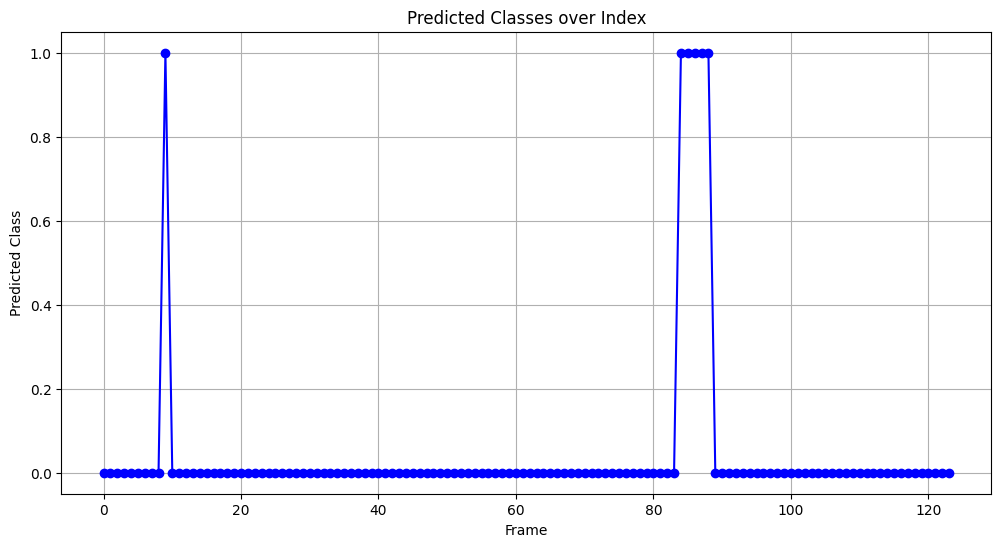

In [12]:
# Assuming 'df' has a 'prediction' column with predicted classes
# Plot predictions over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['prediction'], marker='o', linestyle='-', color='b')
plt.xlabel('Frame')
plt.ylabel('Predicted Class')
plt.title('Predicted Classes over Index')
plt.grid(True)
plt.show()

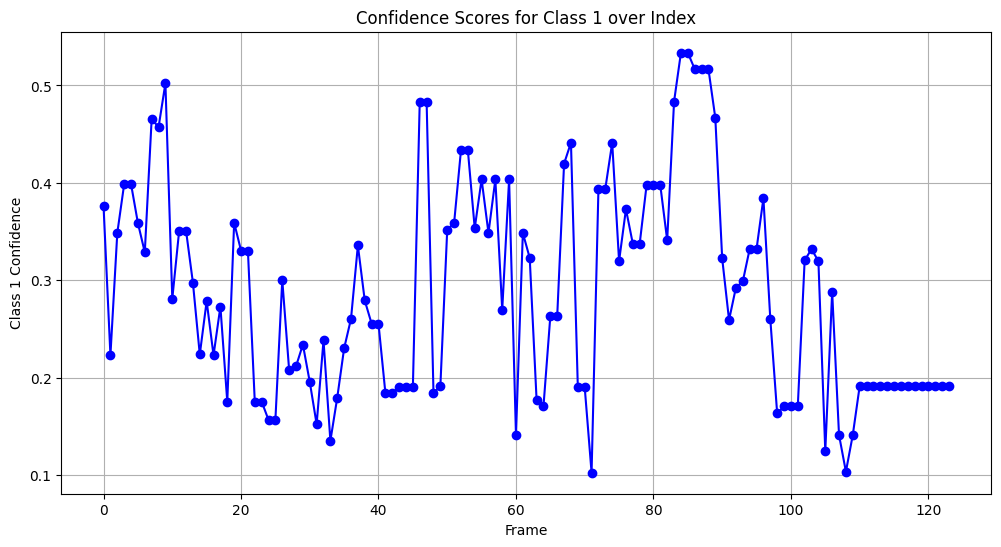

In [13]:
# Plot the confidence scores for class 1 over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Class_1_Confidence'], marker='o', linestyle='-', color='b')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 over Index')
plt.grid(True)
plt.show()

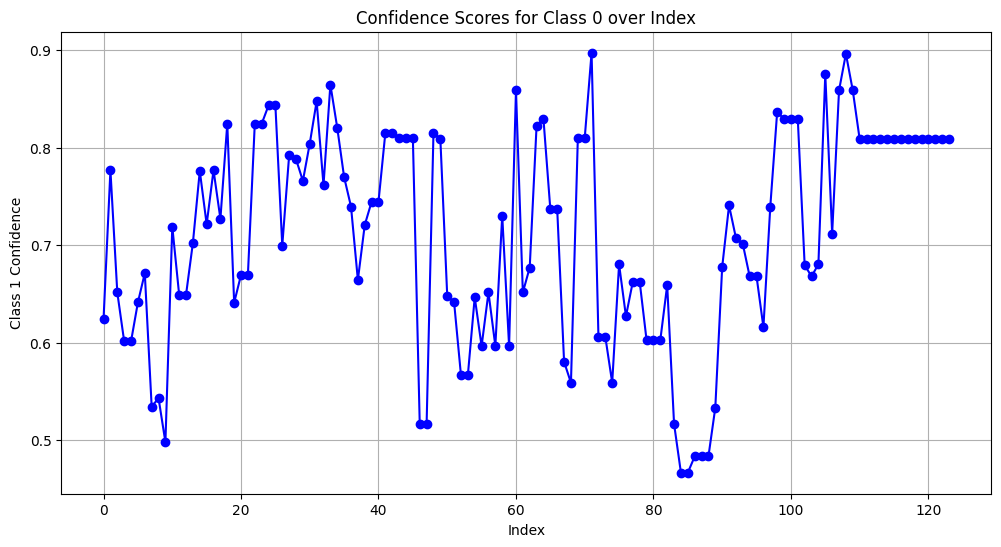

In [14]:
# Plot the confidence scores for class 1 over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Class_0_Confidence'], marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 0 over Index')
plt.grid(True)
plt.show()

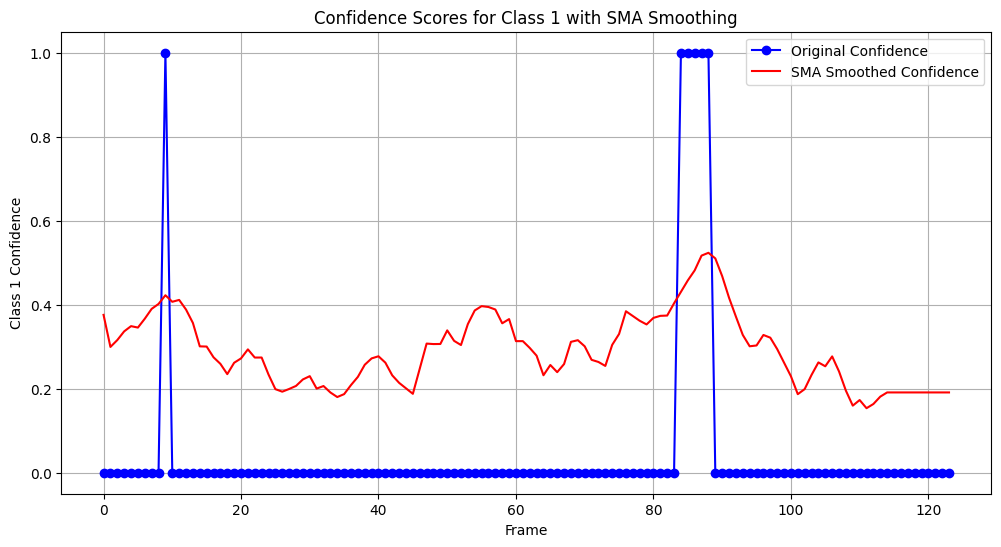

In [15]:
# Plot the original and smoothed confidence scores
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['prediction'], marker='o', linestyle='-', color='b', label='Original Confidence')
plt.plot(df.index, df['SMA_Confidence'], linestyle='-', color='r', label='SMA Smoothed Confidence')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 with SMA Smoothing')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,prediction,Class_0_Confidence,Class_1_Confidence,SMA_Confidence,SG_Confidence
0,1.137225,110.963758,0.306855,2.260341,0.477995,35.375833,0.060315,0.199483,0.102080,0.152264,...,0.936048,0.430766,0.627155,0.247798,0.401258,0,0.624161,0.375839,0.375839,0.295703
1,1.137232,109.921817,0.301530,0.950430,0.479558,22.886365,0.060801,0.204045,0.102130,0.152528,...,2.219415,0.430768,0.625561,12.804963,9.823662,0,0.776899,0.223101,0.299470,0.325260
2,1.778674,48.686319,0.390972,0.965363,0.618071,4.885290,0.079244,0.148892,0.152647,0.173060,...,0.699099,2.526505,0.878061,1.630164,35.579337,0,0.651410,0.348590,0.315843,0.350333
3,1.142504,51.771859,0.293988,0.968027,0.631099,10.606872,0.083047,0.154644,0.130973,0.196869,...,0.698094,2.510655,0.836347,1.516369,42.713863,0,0.601269,0.398731,0.336565,0.370924
4,1.143020,53.597939,0.293568,0.969031,0.663967,11.293593,0.087403,0.161941,0.133308,0.089083,...,0.698317,2.495618,0.841503,0.097235,0.555733,0,0.601269,0.398731,0.348998,0.387032


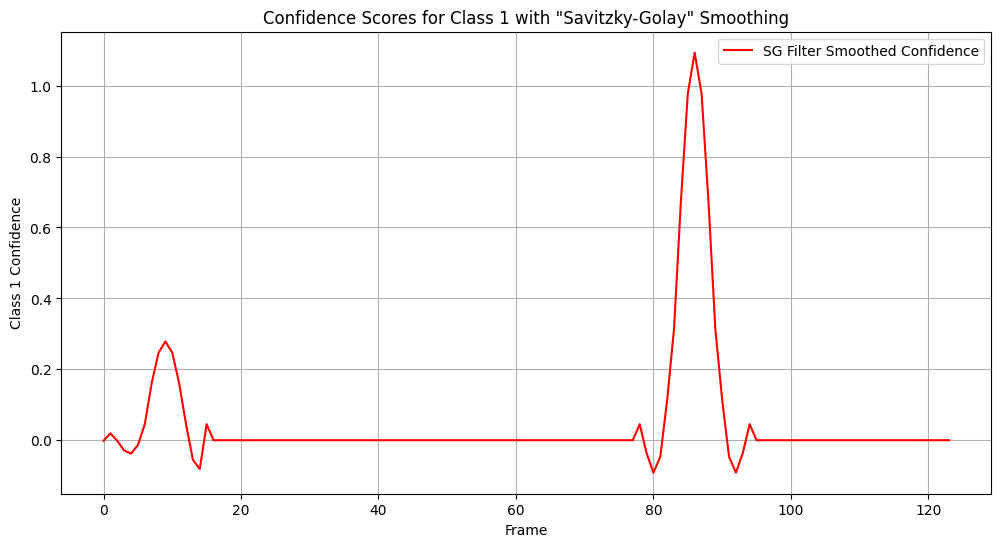

In [17]:
df = original_df.copy()
# Optionally add predictions to the dataframe
df['prediction'] = predictions
df['Class_1_Confidence'] = probabilities[:, 1]

# Define parameters for Savitzky-Golay filter
window_length = 13  # Window length must be odd
polyorder = 4       # Polynomial order

# Apply Savitzky-Golay filter
df['SG_Confidence'] = savgol_filter(df['prediction'], window_length=window_length, polyorder=polyorder)

# Plot the original and smoothed confidence scores
plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Class_1_Confidence'], marker='o', linestyle='-', color='b', label='Original Confidence')
plt.plot(df.index, df['SG_Confidence'], linestyle='-', color='r', label='SG Filter Smoothed Confidence')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 with "Savitzky-Golay" Smoothing')
plt.legend()
plt.grid(True)
plt.show()

## Action Trigger Module

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,prediction,Class_1_Confidence,SG_Confidence
0,1.137225,110.963758,0.306855,2.260341,0.477995,35.375833,0.060315,0.199483,0.102080,0.152264,...,0.209278,1.718577,0.936048,0.430766,0.627155,0.247798,0.401258,0,0.375839,-0.001616
1,1.137232,109.921817,0.301530,0.950430,0.479558,22.886365,0.060801,0.204045,0.102130,0.152528,...,0.044020,1.743550,2.219415,0.430768,0.625561,12.804963,9.823662,0,0.223101,0.019392
2,1.778674,48.686319,0.390972,0.965363,0.618071,4.885290,0.079244,0.148892,0.152647,0.173060,...,0.038784,1.772231,0.699099,2.526505,0.878061,1.630164,35.579337,0,0.348590,-0.001763
3,1.142504,51.771859,0.293988,0.968027,0.631099,10.606872,0.083047,0.154644,0.130973,0.196869,...,0.036994,1.820661,0.698094,2.510655,0.836347,1.516369,42.713863,0,0.398731,-0.029089
4,1.143020,53.597939,0.293568,0.969031,0.663967,11.293593,0.087403,0.161941,0.133308,0.089083,...,1.002033,1.843062,0.698317,2.495618,0.841503,0.097235,0.555733,0,0.398731,-0.037698


In [19]:
values = df['SG_Confidence']
values.head()

0   -0.001616
1    0.019392
2   -0.001763
3   -0.029089
4   -0.037698
Name: SG_Confidence, dtype: float64

In [20]:
# Define thresholds
threshold_class_0 = 0.4
threshold_class_1 = 0.6

# Initialize count for cycles
cycle_count = 0

# Iterate through the dataframe
for i in range(len(df) - 1):
    current_confidence = df.loc[i, 'SG_Confidence']
    next_confidence = df.loc[i + 1, 'SG_Confidence']
    
    # Determine classes based on thresholds
    class_current = 1 if current_confidence >= threshold_class_1 else 0
    class_next = 1 if next_confidence >= threshold_class_1 else 0
    
    # Check for cycle
    if class_current == 0 and class_next == 1:
        cycle_count += 1

print(f'Number of cycles: {cycle_count}')

Number of cycles: 1


## Putting everything together

In [21]:
def predict(video_name,
           window_length=13,
           polyorder=4,
           threshold_class_0 = 0.4,
           threshold_class_1 = 0.6):

    test_dir = "/home/sadat/Desktop/cow-bytes/experiments/1_decision_tree/data/test_poses"
    video_path = os.path.join(test_dir, video_name + '.npy')
    
    # Load the NumPy array from the file
    np_array = np.load(video_path)

    # Convert the NumPy array to a DataFrame
    df = pd.DataFrame(np_array)

    # Predict the class for each row
    predictions = clf.predict(df)

    # Get predicted probabilities
    probabilities = clf.predict_proba(df)

    original_df = df.copy()
    df = original_df.copy()

    # Optionally add predictions to the dataframe
    df['prediction'] = predictions

    # Get the predictions proba
    df['Class_0_Confidence'] = probabilities[:, 0]
    df['Class_1_Confidence'] = probabilities[:, 1]

    # Apply Savitzky-Golay filter
    df['SG_Confidence'] = savgol_filter(df['prediction'], window_length=window_length, polyorder=polyorder)
    
    # Initialize count for cycles
    cycle_count = 0

    # Iterate through the dataframe
    for i in range(len(df) - 1):
        current_confidence = df.loc[i, 'SG_Confidence']
        next_confidence = df.loc[i + 1, 'SG_Confidence']

        # Determine classes based on thresholds
        class_current = 1 if current_confidence >= threshold_class_1 else 0
        class_next = 1 if next_confidence >= threshold_class_1 else 0

        # Check for cycle
        if class_current == 0 and class_next == 1:
            cycle_count += 1

    return cycle_count

## Presentation

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
cap = cv2.VideoCapture("./e8793e070b7f0381aef1a8f802010929abf59e7dd0014be27be3844ff54ae181.mp4")

# Define thresholds
threshold_class_0 = 0.4
threshold_class_1 = 0.6

# Get predictions and filtered data
predictions = df['prediction'].values
sg_confidence = df['SG_Confidence'].values

# Create output video writer with higher resolution
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_resolution = (1920, 1080)  # Higher resolution
out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), output_resolution)

# Initialize frame index and cycle count
frame_index = 0
cycle_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize frame to output resolution
    frame = cv2.resize(frame, output_resolution)
    
    # Plot graph in real-time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[:frame_index+1], df['SG_Confidence'][:frame_index+1], linestyle='-', color='r', label='SG Filter Smoothed Confidence')
    plt.xlabel('Frame')
    plt.ylabel('Class 1 Confidence')
    plt.title('Confidence Scores for Class 1 with Savitzky-Golay Smoothing')
    plt.legend()
    plt.grid(True)
    
    # Convert plot to OpenCV image
    plt.savefig('plot.png', bbox_inches='tight')
    plt.close()
    plot_img = cv2.imread('plot.png')
    
    # Resize plot image to fit on video frame
    h, w, _ = frame.shape
    plot_img = cv2.resize(plot_img, (int(0.4*w), int(0.3*h)))
    
    # Draw plot on video frame in bottom left corner
    x_offset = int(w - plot_img.shape[1] - 10)
    y_offset = int(h - plot_img.shape[0] - 10)
    frame[y_offset:y_offset+plot_img.shape[0], x_offset:x_offset+plot_img.shape[1]] = plot_img
    
    # Display cycle count in top right corner with smaller font size
    cv2.putText(frame, f'Cycle Count: {cycle_count}', (int(0.8*w), 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Check for cycle
    if frame_index > 0 and frame_index < 124:
        current_confidence = df.loc[frame_index-1, 'SG_Confidence']
        next_confidence = df.loc[frame_index, 'SG_Confidence']
        class_current = 1 if current_confidence >= threshold_class_1 else 0
        class_next = 1 if next_confidence >= threshold_class_1 else 0
        if class_current == 0 and class_next == 1:
            cycle_count += 1
    
    # Write frame to output video
    out.write(frame)
    cv2.imshow('Frame', frame)
    
    # Increment frame index
    frame_index += 1
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

## Evaluation

In [23]:
test_df = pd.read_csv("../1_decision_tree/test_split.csv")
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
0,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.680204,1.001039,1.818053,6.391051,0.024300,2.098169,0.030116,0.224765,...,1.687835,0.622105,0.251399,0.489040,0.453303,0.072244,0.076263,1.196327,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
1,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.655266,1.038904,1.840115,6.635978,0.019025,1.362402,0.022815,0.176124,...,1.728855,1.089641,0.231580,0.378943,0.475799,0.142584,0.407882,4.539961,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
2,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.641108,1.176112,1.887418,1.006742,0.134968,1.328835,0.016136,3.316055,...,1.607063,0.614543,1.077742,25.187317,0.648971,1.061408,0.024128,1.199147,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
3,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.631566,1.200873,1.934261,1.008189,1.031394,0.937317,0.014289,1.774221,...,1.615238,0.614404,0.189794,0.420378,0.484753,1.060497,0.022992,1.200092,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
4,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.599901,1.378391,1.983248,0.992031,1.331343,1.535677,0.020715,2.975804,...,1.581292,0.600289,0.077822,2.428062,0.501489,1.059688,0.016834,1.196336,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...


In [24]:
names_array = test_df['video_name'].unique()
names_array

array(['747419b046c70c69e41b2857b7af91465dcc0c49e0e91ca96f253da03067dd32',
       'd40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719fb52af72bf43224086',
       '85ff8081163fa72a539d5215af9e01f86a078178bd0b2f4b93c71ba033ab456a',
       'ed504fc41cd8eebaf15e43dd858dab5aaadcec172a4773f903e6dfcf8791b38e',
       'a84ae1282abc51e5698d2b63472b892cae3ffdabacc66c9bcf1efabdf637b1e5',
       'e151c20b878c4425ce832d2f5120a218f4e31b765ec2a352130a5a877fddd041',
       '95040dc15ce9ada82353103a13d1b395c937a9ea6747159f631bfa492b98373f',
       '3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b487627190a1e4ac88f',
       '0baf219dc65f856d93429bfcaf5c6d9a1f2a8e813cc452f01f4819d32baca3d5',
       '73c745847dc41f6e0c54fefcadfd13613a200d58b7073017124483409638c9be',
       '10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251402e6112e4407de2e7'],
      dtype=object)

In [25]:
df = pd.read_csv('../1_decision_tree/data/cow_bite_links_1407_clipped.csv')
df.head()

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L131,L132,L133,L134,L135,L136,L137,L138,L139,L140
0,cow_bite,1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba96...,8,0,15,29.0,39.0,52.0,64.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,18,0,9,20.0,27.0,39.0,46.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,11,0,10,18.0,28.0,38.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.iloc[0]['name']

'1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba962b500fd088e25a937b_1.mp4'

In [27]:
# Filter rows where the 'name' column contains any of the substrings in names_array
filtered_df = df[df['name'].apply(lambda x: any(name in x for name in names_array))]

# Display the filtered DataFrame
filtered_df.head()

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L131,L132,L133,L134,L135,L136,L137,L138,L139,L140
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,17,0,7,25.0,31.0,50.0,59.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,12,0,10,404.0,412.0,426.0,438.0,451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,13,0,15,31.0,44.0,59.0,67.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['prediction'] = df['name'].apply(lambda x: predict(x.split('.')[0]))

/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sadat/miniconda3/envs/cowbytes/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifi

In [29]:
df

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L132,L133,L134,L135,L136,L137,L138,L139,L140,prediction
0,cow_bite,1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba96...,8,0,15,29.0,39.0,52.0,64.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,18,0,9,20.0,27.0,39.0,46.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,11,0,10,18.0,28.0,38.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,cow_bite,d40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719...,10,0,5,12.0,18.0,26.0,31.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
86,cow_bite,d40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719...,20,0,4,12.0,16.0,23.0,27.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87,cow_bite,d40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719...,4,0,5,13.0,18.0,26.0,30.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
88,cow_bite,e8793e070b7f0381aef1a8f802010929abf59e7dd0014b...,7,0,6,17.0,23.0,31.0,39.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Results

In [30]:
# Calculate MAE
mae = (df['count'] - df['prediction']).abs().mean()

# Calculate Off-by-One Accuracy
off_by_one_accuracy = (df['count'] - df['prediction']).abs() <= 1
off_by_one_accuracy = off_by_one_accuracy.mean()  # Convert boolean values to percentage

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Off-by-One Accuracy: {off_by_one_accuracy * 100:.2f}%")

Mean Absolute Error (MAE): 3.188888888888889
Off-by-One Accuracy: 56.67%


## Summary

The model seems to be working pretty well for most of the videos. I know this is not clear here with the final evaluation but the signal is pretty clear (much less noisier than just decision tree).

The reason it struggles is due to off-angle videos. Have a look [here](https://drive.google.com/drive/u/1/folders/1iE1GjrPWQhHzEChAKIn9LvJ4PtQmtzWe).

The reason decision tree works better is because it’s simpler. The fix to this would just be to annotate more data that has this angle where some of the mouth poses are just not visible.